<a href="https://colab.research.google.com/github/AndrewSlutsky/DA/blob/main/Lab4DA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Класифікація даних за допомогою повнозвязної нейромережі**


In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import os
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from tensorflow.keras.utils import to_categorical
from cv2 import imread, resize

In [21]:
pulsar_data = pd.read_csv('pulsar_data_train.csv')

pulsar_data[' Excess kurtosis of the integrated profile'].fillna(pulsar_data[' Excess kurtosis of the integrated profile'].mean(), inplace=True)
pulsar_data[' Standard deviation of the DM-SNR curve'].fillna(pulsar_data[' Standard deviation of the DM-SNR curve'].mean(), inplace=True)
pulsar_data[' Skewness of the DM-SNR curve'].fillna(pulsar_data[' Skewness of the DM-SNR curve'].mean(), inplace=True)



In [22]:
X = pulsar_data.drop(['target_class'], axis=1)
y = pulsar_data['target_class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape)

(10022, 8)


In [23]:
def create_model():
	model = Sequential()
	model.add(layers.Dense(12, input_dim=8, activation='relu'))
	model.add(layers.Dense(8, activation='relu'))
	model.add(layers.Dense(1, activation='sigmoid'))
	model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
	return model

In [24]:
model = KerasClassifier(build_fn=create_model, epochs=150, batch_size=10, verbose=0)
model.fit(X_train, y_train)
model.score(X_test, y_test)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead.
  """Entry point for launching an IPython kernel.


0.9792497754096985

# **Класифікація зображень за допомогою згорткової нейромережі**


In [8]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *

In [9]:
image_size = (100, 100)
batch = 32

train = keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/data science/Chess/',
    validation_split=.2,
    subset='training',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 552 files belonging to 6 classes.
Using 442 files for training.


In [11]:
validation = keras.preprocessing.image_dataset_from_directory(
    '/content/drive/MyDrive/data science/Chess/',
    validation_split=.2,
    subset='validation',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 552 files belonging to 6 classes.
Using 110 files for validation.


In [13]:
input_shape = (image_size[0], image_size[1], 3)
reg = keras.regularizers.l2(0.0005)

model = keras.Sequential()
model.add(Conv2D(32, (3, 3), padding="same", activation="relu", input_shape=image_size + (3,), kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding="same", activation="relu", kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))


model.add(Conv2D(128, (3, 3), padding="same", activation="relu", kernel_regularizer=reg))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(len(train.class_names), activation='softmax'))


model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 100, 100, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 50, 50, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 50, 50, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 25, 25, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 25, 25, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 12, 12, 128)     

In [14]:
model.compile(
    loss="categorical_crossentropy",
    optimizer="adam",
    metrics=["accuracy"]
)

epochs = 40
model.fit(
    train,
    epochs=epochs,
    validation_data=validation
);

Epoch 1/40
14/14 [==============================] - 19s 948ms/step - loss: 2.3504 - accuracy: 0.1946 - val_loss: 8.6070 - val_accuracy: 0.2727
Epoch 2/40
14/14 [==============================] - 14s 793ms/step - loss: 2.0417 - accuracy: 0.2081 - val_loss: 3.6685 - val_accuracy: 0.2182
Epoch 3/40
14/14 [==============================] - 14s 835ms/step - loss: 2.0250 - accuracy: 0.2557 - val_loss: 5.2699 - val_accuracy: 0.1182
Epoch 4/40
14/14 [==============================] - 25s 1s/step - loss: 1.9886 - accuracy: 0.2670 - val_loss: 7.8102 - val_accuracy: 0.1091
Epoch 5/40
14/14 [==============================] - 14s 792ms/step - loss: 1.8261 - accuracy: 0.3213 - val_loss: 7.5051 - val_accuracy: 0.2364
Epoch 6/40
14/14 [==============================] - 14s 796ms/step - loss: 1.8342 - accuracy: 0.3100 - val_loss: 18.1651 - val_accuracy: 0.2455
Epoch 7/40
14/14 [==============================] - 13s 782ms/step - loss: 1.8296 - accuracy: 0.3213 - val_loss: 5.8023 - val_accuracy: 0.1182
E

# **Прогнозування значень часового ряду**


In [34]:
df = pd.read_csv('banknifty.csv')
df.head(5)

,index,date,time,open,high,low,close
0,BANKNIFTY,20121203,09:16,12125.70,12161.70,12125.70,12160.95
1,BANKNIFTY,20121203,09:17,12161.75,12164.80,12130.40,12130.40
2,BANKNIFTY,20121203,09:18,12126.85,12156.10,12126.85,12156.10
3,BANKNIFTY,20121203,09:19,12157.25,12164.75,12151.60,12164.20
4,BANKNIFTY,20121203,09:20,12162.80,12162.80,12148.20,12151.15


In [35]:
df = df.drop(['index', 'time'], axis = 1)
df.Date = pd.to_datetime(df['date'])
df.set_index('date', inplace = True)
df.head(5)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  


,open,high,low,close
date,,,,
20121203,12125.70,12161.70,12125.70,12160.95
20121203,12161.75,12164.80,12130.40,12130.40
20121203,12126.85,12156.10,12126.85,12156.10
20121203,12157.25,12164.75,12151.60,12164.20
20121203,12162.80,12162.80,12148.20,12151.15


In [36]:
df.isnull().sum()

open     0
high     0
low      0
close    0
dtype: int64

In [37]:
sc = MinMaxScaler(feature_range=(0,1))

def load_data(datasetname, column, seq_len):
    # A support function to help prepare datasets for an RNN/LSTM/GRU
    data = datasetname.loc[:,column]

    sequence_length = seq_len + 1
    result = []
    for index in range(len(data) - sequence_length):
        result.append(data[index: index + sequence_length])
    
    result = np.array(result)

    #Last 10% is used for validation test, first 90% for training
    row = round(0.9 * result.shape[0])
    train = result[:int(row), :]
    np.random.shuffle(train)
    x_train = train[:, :-1]
    y_train = train[:, -1]
    x_test = result[int(row):, :-1]
    y_test = result[int(row):, -1]

    x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
    x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))  

    return [x_train, y_train, x_test, y_test]

In [38]:
X_train, Y_train, X_test, Y_test = load_data(df, 'close', 50)


In [39]:
model=Sequential()

model.add(LSTM(25, activation = 'relu', input_shape = (X_train.shape[1],1)))
model.add(Dense(10))
model.add(Dense(1))

model.compile( loss = 'mean_squared_error', optimizer = 'adam')


model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
10337/10337 [==============================] - 224s 22ms/step - loss: 26808870.0000
Epoch 2/10
10337/10337 [==============================] - 214s 21ms/step - loss: 121915.5234
Epoch 3/10
10337/10337 [==============================] - 212s 21ms/step - loss: 5103.1812
Epoch 4/10
10337/10337 [==============================] - 210s 20ms/step - loss: 4773.1304
Epoch 5/10
10337/10337 [==============================] - 211s 20ms/step - loss: 4937.9771
Epoch 6/10
10337/10337 [==============================] - 213s 21ms/step - loss: 4863.5410
Epoch 7/10
10337/10337 [==============================] - 211s 20ms/step - loss: 4824.7886
Epoch 8/10
10337/10337 [==============================] - 215s 21ms/step - loss: 4844.5688
Epoch 9/10
10337/10337 [==============================] - 213s 21ms/step - loss: 4783.0142
Epoch 10/10
10337/10337 [==============================] - 215s 21ms/step - loss: 4782.8643


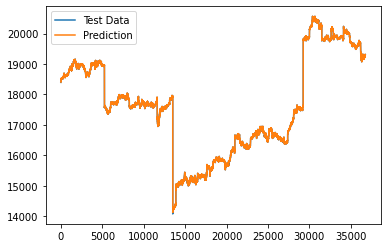

In [40]:
prediction = model.predict(X_test)


plt.plot(Y_test, label='Test Data') 
plt.plot(prediction, label='Prediction') 
plt.legend()
plt.show() 